In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [22]:
data_path = 'fatalities_isr_pse_conflict_2000_to_2023.csv'
df = pd.read_csv(data_path)

In [23]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [24]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [25]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [26]:
df.shape

(11124, 16)

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [28]:
df.nunique()


name                            11083
date_of_event                    2405
age                                95
citizenship                         4
event_location                    494
event_location_district            20
event_location_region               3
date_of_death                    2593
gender                              2
took_part_in_the_hostilities        5
place_of_residence                580
place_of_residence_district        20
type_of_injury                     13
ammunition                         21
killed_by                           3
notes                            6744
dtype: int64

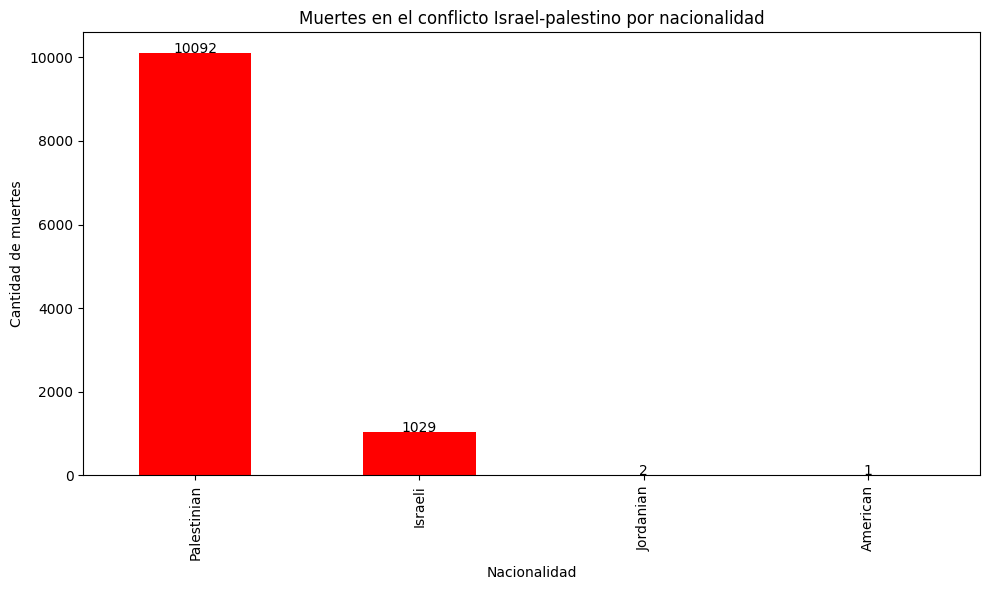

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar el número de muertes por nacionalidad
deaths_by_nationality = df['citizenship'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño opcional de la figura

# Plotear la gráfica de barras
bars = deaths_by_nationality.plot(kind='bar', color='red')

# Añadir etiquetas y título
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de muertes')
plt.title('Muertes en el conflicto Israel-palestino por nacionalidad')

# Mostrar el número correspondiente encima de cada barra
for i, v in enumerate(deaths_by_nationality):
    bars.text(i, v + 0.1, str(v), ha='center')

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño
plt.show()


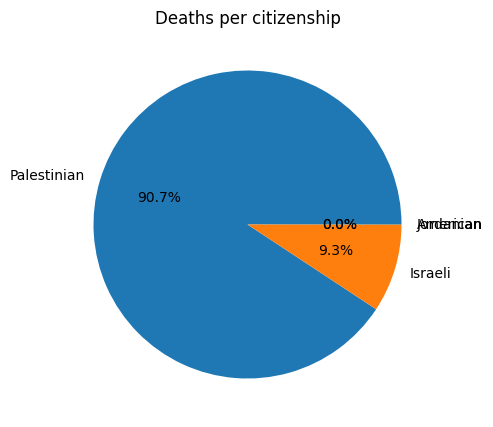

In [30]:
# Extract the column containing categorical data
column_values = df['citizenship']

# Calculate the count of each category
category_counts = column_values.value_counts()

# Plotting
plt.figure(figsize=(5, 5))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Deaths per citizenship')
plt.show()

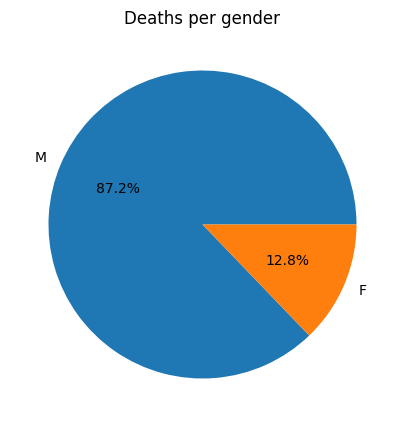

In [31]:
# Extract the column containing categorical data
column_values = df['gender']

# Calculate the count of each category
category_counts = column_values.value_counts()

# Plotting
plt.figure(figsize=(5, 5))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Deaths per gender')
plt.show()

In [32]:

result = df[df['gender'] == 'F'].groupby('citizenship').size()
sorted_result = result.sort_values(ascending = False)
sorted_result.head()

citizenship
Palestinian    1091
Israeli         331
Jordanian         1
dtype: int64

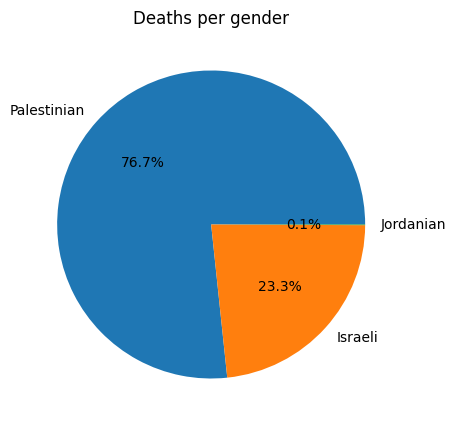

In [33]:
# Plotting
plt.figure(figsize=(5, 5))  # Optional: Adjust the figure size
plt.pie(sorted_result, labels=sorted_result.index, autopct='%1.1f%%')
plt.title('Deaths per gender')
plt.show()

<Axes: xlabel='Age_Group'>

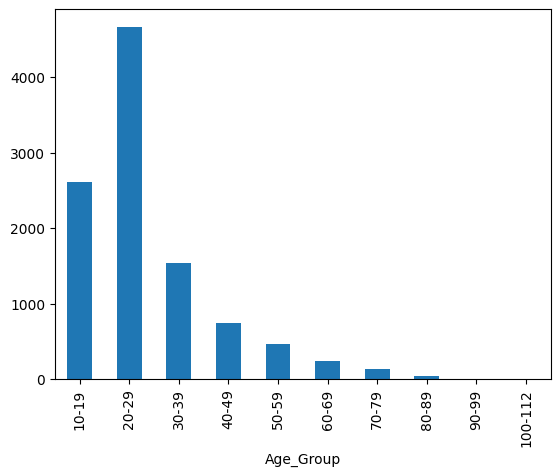

In [35]:
# Creating group ages

age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-112']
age_bins = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 112]
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age_groups = df["Age_Group"].value_counts()
age_groups.sort_index().plot(kind='bar')

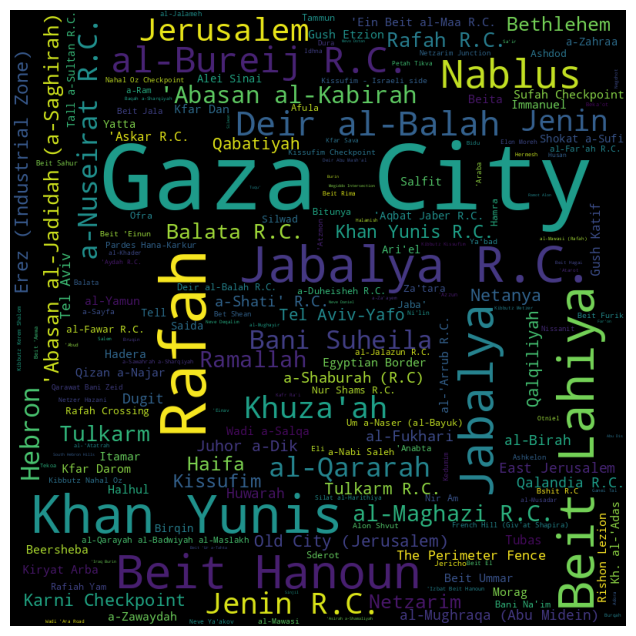

In [42]:
from wordcloud import WordCloud


deaths_by_region = df['event_location'].value_counts()
wordcloud = (WordCloud(width=800, height=800, background_color='black').
             generate_from_frequencies(deaths_by_region))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

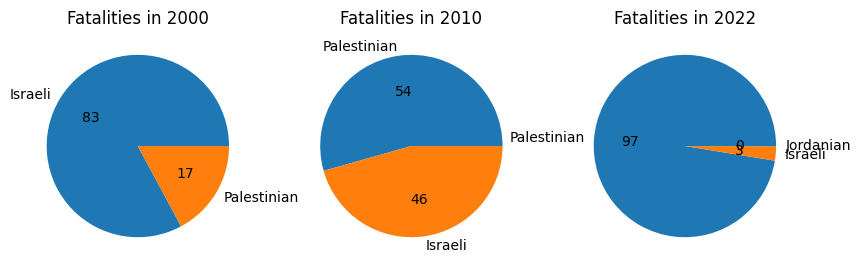

In [47]:
# Convertir la columna 'date_of_event' a tipo datetime si aún no lo está
df['date_of_event'] = pd.to_datetime(df['date_of_event'])

counts_2000 = df.loc[df['date_of_event'].dt.year == 2000]['citizenship'].value_counts()
counts_2010 = df.loc[df['date_of_event'].dt.year == 2001]['citizenship'].value_counts()
counts_2022 = df.loc[df['date_of_event'].dt.year == 2014]['citizenship'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].pie(counts_2000[:5], labels=counts_2000[:5].index, autopct=lambda x: f'{x:.0f}')
axs[0].set_title('Fatalities in 2000')

axs[1].pie(counts_2010[:5], labels=counts_2010[:5].index, autopct=lambda x: f'{x:.0f}')
axs[1].set_title('Fatalities in 2010')

axs[2].pie(counts_2022[:5], labels=counts_2022[:5].index, autopct=lambda x: f'{x:.0f}')
axs[2].set_title('Fatalities in 2022')

plt.show()

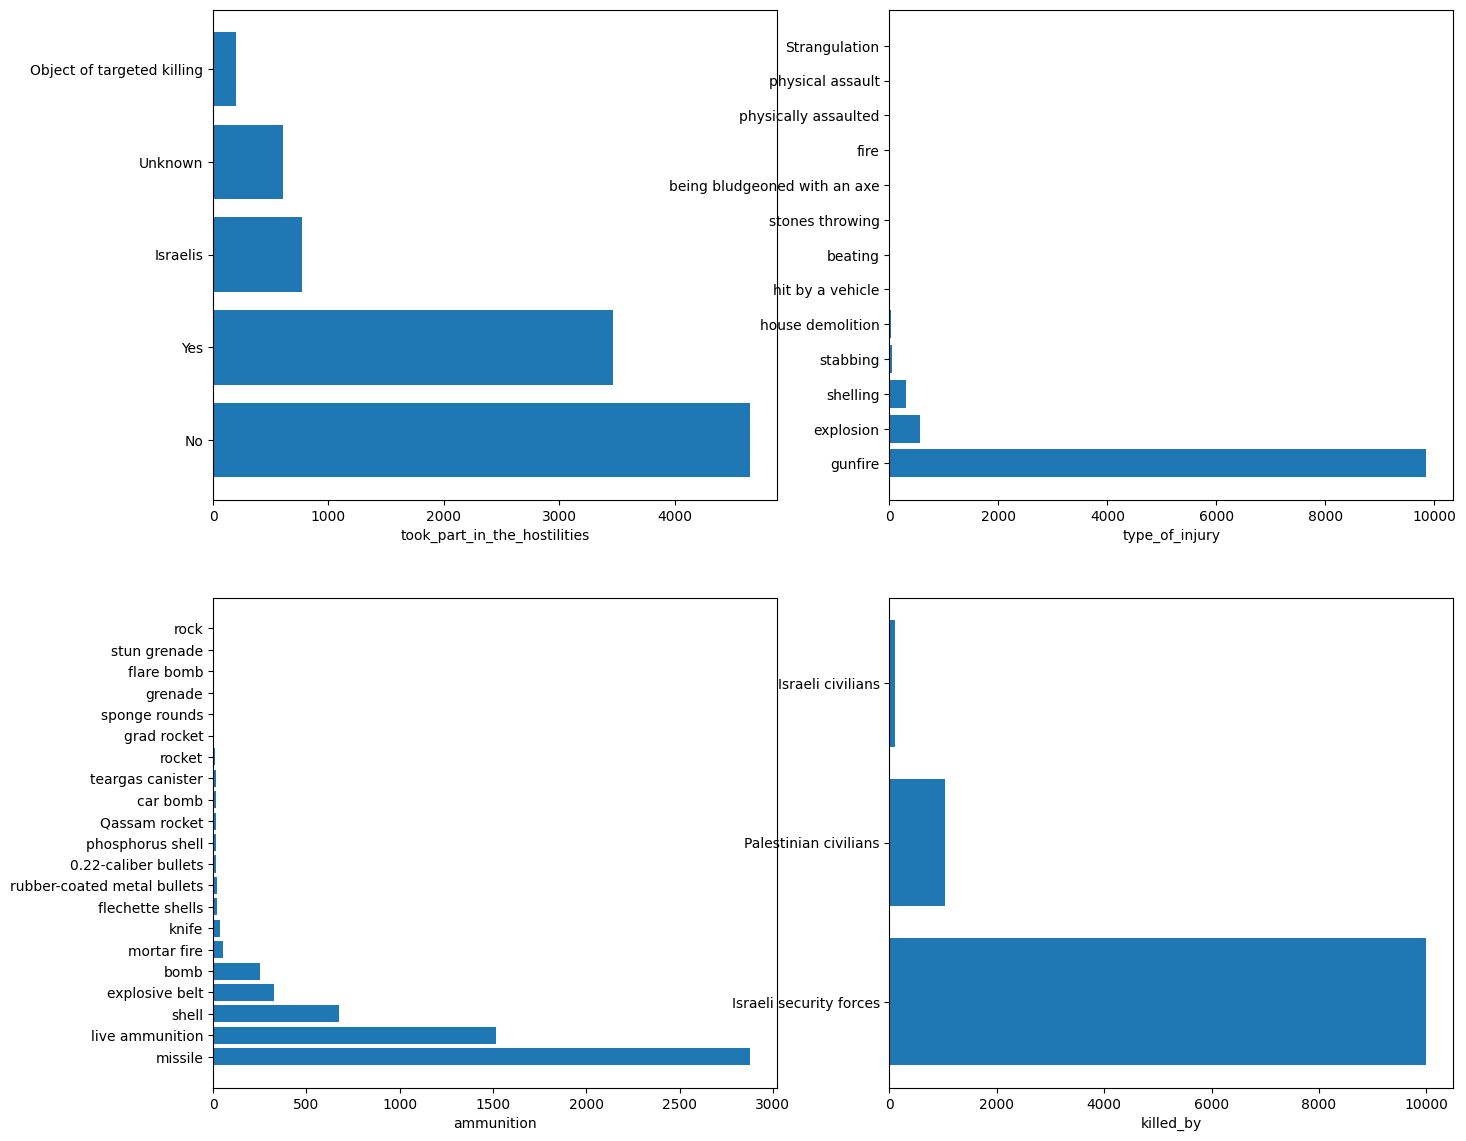

In [55]:
# Creamos gráficos de barras para las variables categóricas
bar_cols = ['took_part_in_the_hostilities', 'type_of_injury', 'ammunition', 'killed_by']
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize=(16,14))
for i in range(2):
    for j in range(2):
        # if i*2 + j >=5 :
        #     break
        counts = df[bar_cols[i*2 + j]].value_counts()
        ax[i,j].barh(counts.index, counts.values)
        ax[i,j].set_xlabel(bar_cols[i*2 + j])

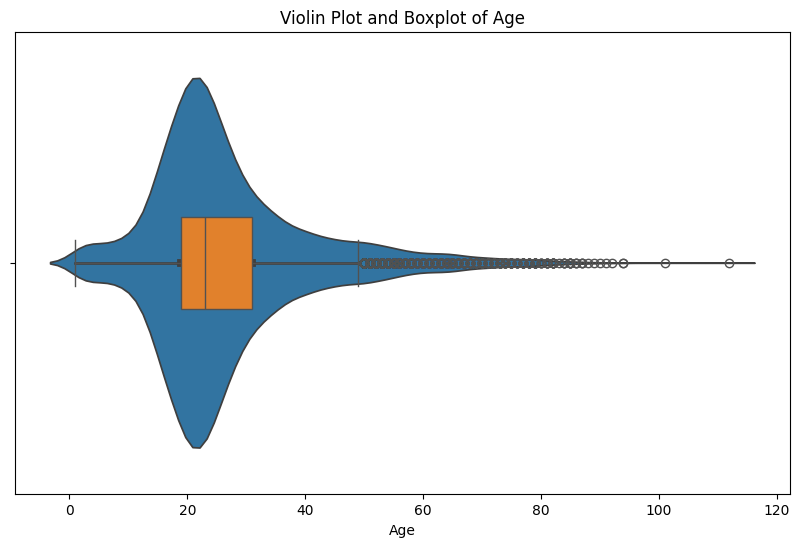

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Trazar un gráfico de violín
sns.violinplot(x='age', data=df)

# Trazar un diagrama de caja (boxplot)
sns.boxplot(x='age', data=df, width=0.2)

# Añadir título y etiquetas
plt.title('Violin Plot and Boxplot of Age')
plt.xlabel('Age')

# Mostrar la gráfica
plt.show()
